In [152]:
from graphmodels.utils import parse_parameter_json
from models.Sarah.WaterModel import WaterModel

In [153]:
parameters = parse_parameter_json('models/Sarah/parameter_water.json')
inputs = {'ET':0,
          'A':0,
          'WSE': 0.85,
          'ASF': 3,
          'BF': 6}

inputs_parameters = parameters.copy()
inputs_parameters.update(inputs)

In [154]:
results = WaterModel.run(inputs_parameters)

In [155]:
results['ETc']

Fruits                640.667667
Maize                1002.000000
Pasture permanent     521.875000
Potatoes              794.920000
Pulses                529.390000
Rapeseed              445.333333
Sugar beet            627.641667
Sunflower             292.250000
Vegetables            709.750000
dtype: float64

In [156]:
results['IWR']

158065125.40000004

In [161]:
results['KC']

Fruits               0.767267
Maize                1.200000
Pasture permanent    0.625000
Potatoes             0.952000
Pulses               0.634000
Rapeseed             0.533333
Sugar beet           0.751667
Sunflower            0.350000
Vegetables           0.850000
dtype: float64

In [157]:
results['ICU'] * results['AIR']

Fruits               19840701.4
Maize                56479800.0
Pasture permanent     7795125.0
Potatoes             35481888.0
Pulses                8557146.0
Rapeseed                33800.0
Sugar beet           18519865.0
Sunflower           -15488850.0
Vegetables           26845650.0
dtype: float64

In [162]:
results['Ai']

0.022533333333333332

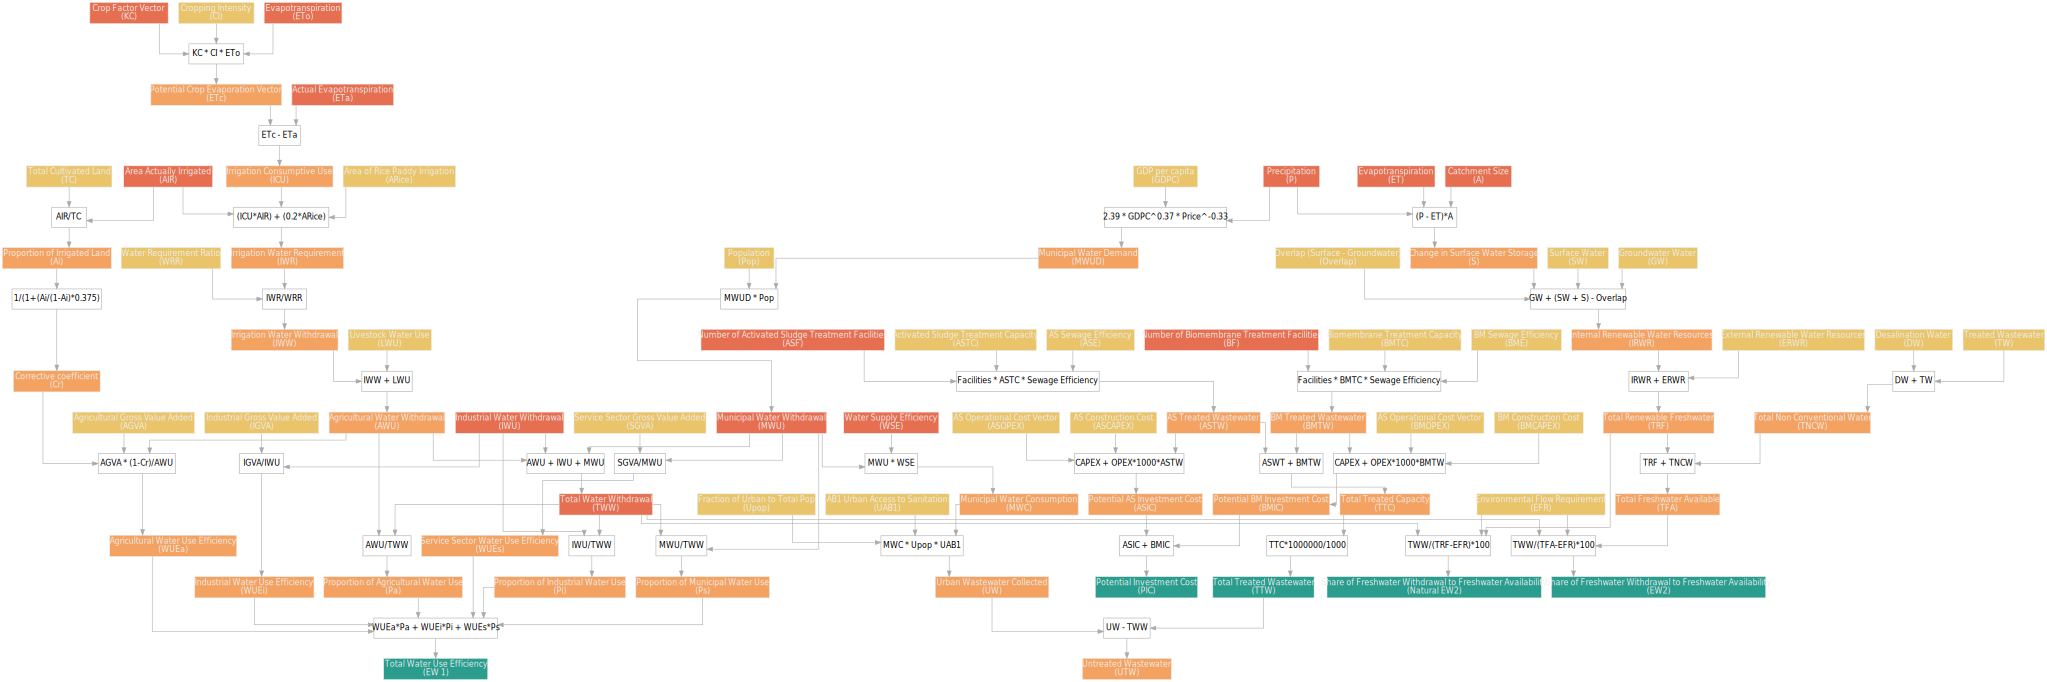

In [4]:
WaterModel.draw()

In [ ]:
%timeit WaterModel.run(inputs_parameters)

# TEST

In [6]:
import pandas as pd
aquastat = pd.read_csv('models/Sarah/data/aquastat.csv')

In [9]:
aquastat = aquastat.dropna(subset=['GGI_code'])

In [85]:
# Aux functions, to improve. The idea is to run the model on the full database at once rather than spliiting all the stuff. Perharps using dataframe around
def pivot(df):
    return df.pivot(index=['Area', 'Year'], columns='GGI_code', values='Value')

def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X

In [86]:
X = df_to_dict(pivot(aquastat))

In [134]:
X['ET'] = 0
X['A'] = 0
X['WSE'] = 0.85
X['ASF'] = 3
X['BF'] = 6
X['BMTC'] = 10950
X['BME'] = 0.85
X['BMCAPEX'] = 10700000
X['BMOPEX'] = 0.58
X['ASTC'] = 30000
X['ASE'] = 0.7333
X['ASCAPEX'] = 27400000
X['ASOPEX'] = 0.35


X['P'] = 1
X['GDPC'] = 1
X['Pop'] = 1
X['Upop'] = 1
X['UAB1']  = 1


X['SGVA'] = 77210620672.9018
X['IGVA'] = 36229461921.5353



X['ETo'] = 835
X['ETa'] = 445
X['ARice'] = 0
X['LWU'] = 0
X['WRR'] = 0.63

X['AGVA'] = 5374740677.76024



X['KC'] = inputs_parameters['KC']


In [139]:
X['CI']

Area         Year  
Afghanistan  1992.0    0.0
             1997.0    0.0
             2000.0    0.0
             2002.0    0.0
             2005.0    0.0
                      ... 
Zimbabwe     2002.0    0.0
             2007.0    0.0
             2012.0    0.0
             2016.0    0.0
             2017.0    0.0
Name: CI, Length: 1709, dtype: float64

In [137]:
X['KC'] 

Fruits               0.767267
Maize                1.200000
Pasture permanent    0.625000
Potatoes             0.952000
Pulses               0.634000
Rapeseed             0.533333
Sugar beet           0.751667
Sunflower            0.350000
Vegetables           0.850000
dtype: float64

In [135]:
WaterModel.run(X)['EW 1'].dropna()

ValueError: cannot join with no overlapping index names